In [1]:
!pip install -q yfinance

# Import Modules

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime

# Loading Dataset

In [47]:
# the tech stock that we will use for the analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# SET UP START AND END TIME TO GRAB THE DATA
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis = 0)
df.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,AMZN
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,AMZN
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,AMZN
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,AMZN
2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39603800,AMZN


In [48]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2.012000e+03
mean,173.881871,176.016464,171.771763,173.941158,173.036748,4.988556e+07
std,73.966538,74.557949,73.265182,73.949487,72.992460,3.041349e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,121.830997,123.365002,119.912500,121.600000,121.600000,2.557108e+07
50%,145.990501,147.977501,144.315254,146.375000,145.831192,4.366095e+07
75%,201.567505,203.774998,199.817497,200.899998,199.887756,6.580298e+07
max,383.760010,384.299988,378.160004,382.700012,382.700012,2.726620e+08


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2021-12-07 to 2023-12-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2012 non-null   float64
 1   High          2012 non-null   float64
 2   Low           2012 non-null   float64
 3   Close         2012 non-null   float64
 4   Adj Close     2012 non-null   float64
 5   Volume        2012 non-null   int64  
 6   company_name  2012 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 125.8+ KB


# Exploratory Data Analysis

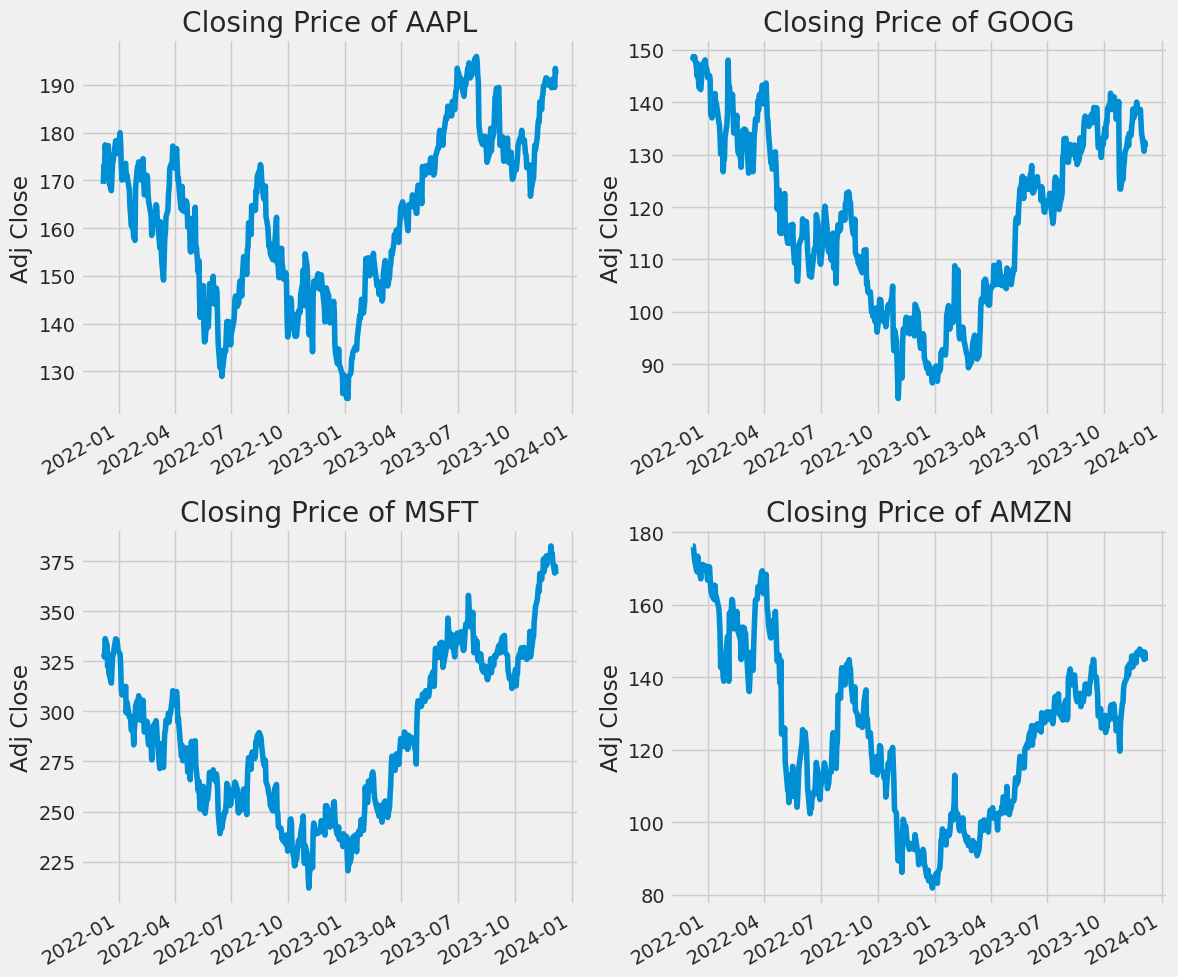

In [50]:
# let's see the historical view of the closing price
plt.figure(figsize = (12,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i - 1]}')

plt.tight_layout()
plt.show()

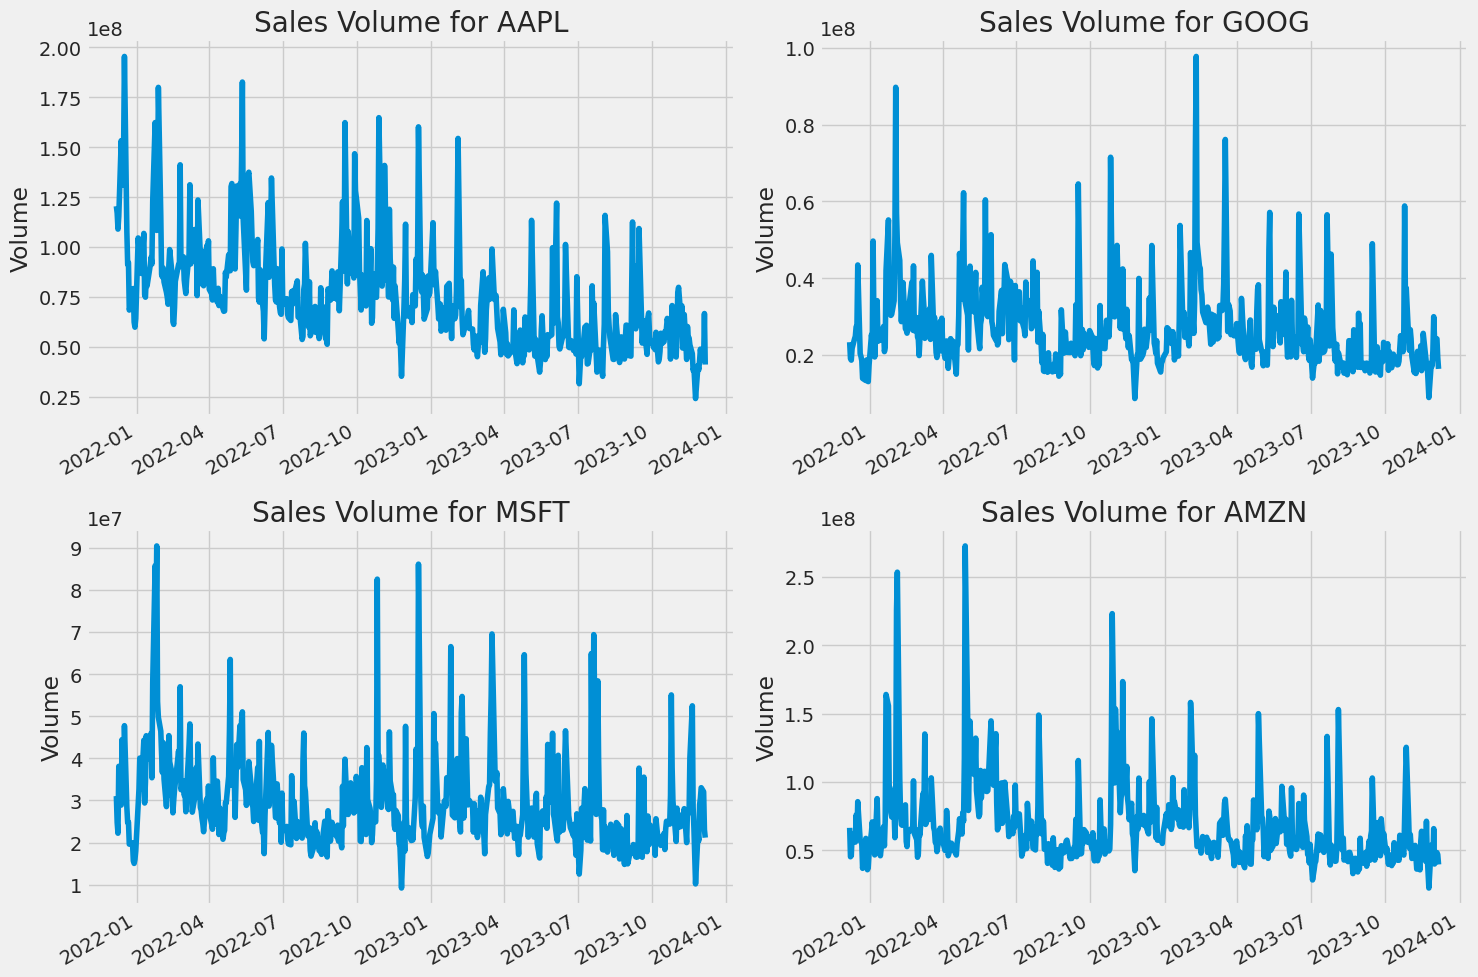

In [51]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

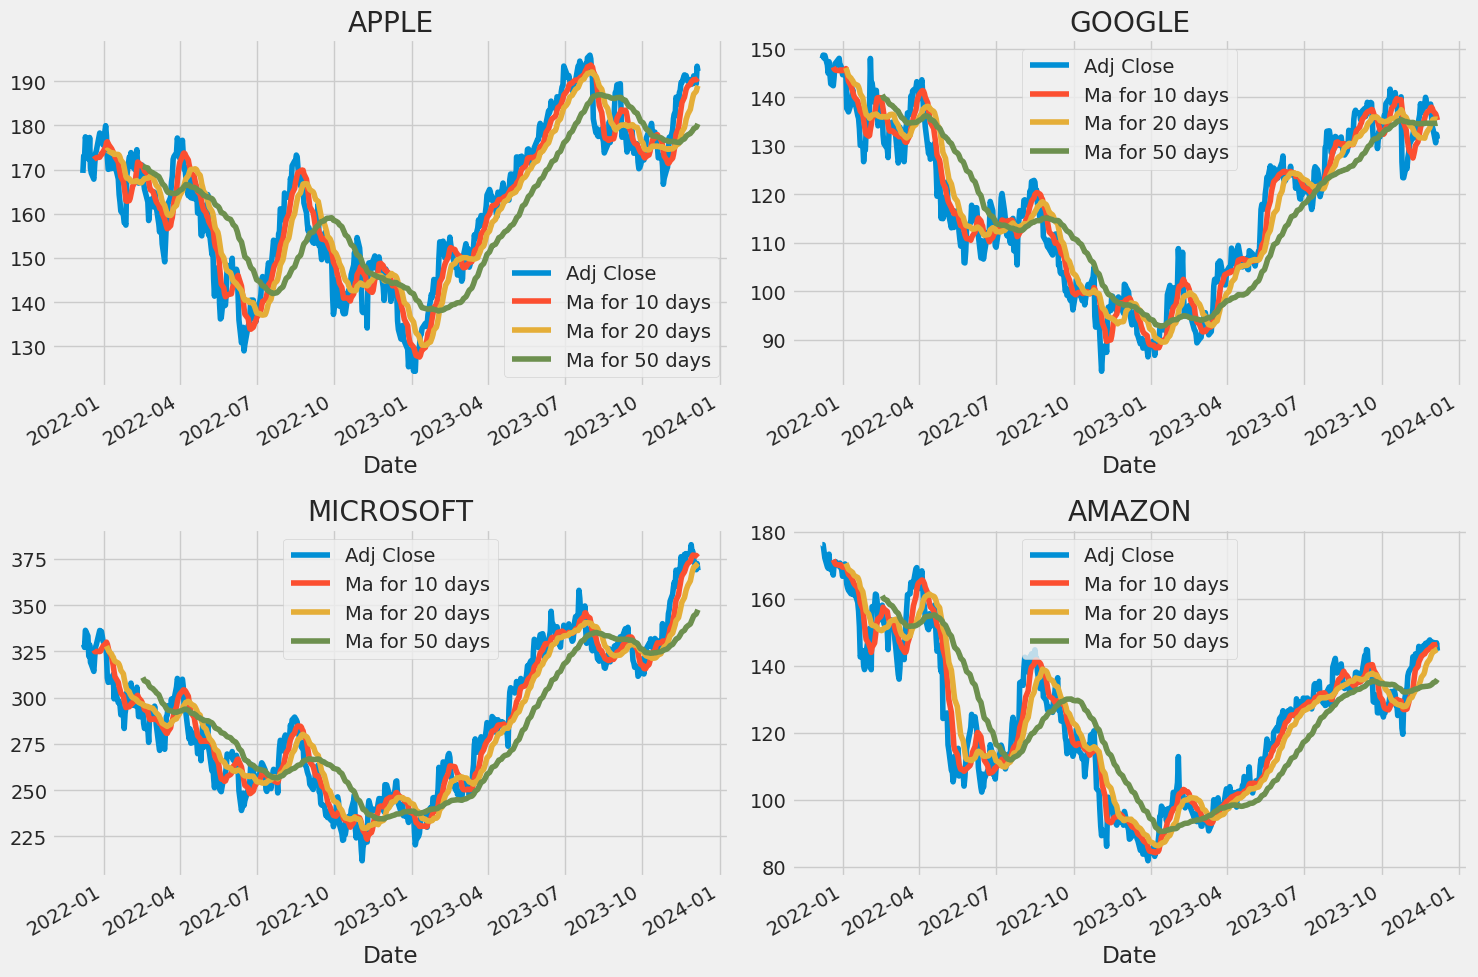

In [52]:
# let see the moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"Ma for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'Ma for 10 days', 'Ma for 20 days', 'Ma for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'Ma for 10 days', 'Ma for 20 days', 'Ma for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'Ma for 10 days', 'Ma for 20 days', 'Ma for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'Ma for 10 days', 'Ma for 20 days', 'Ma for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

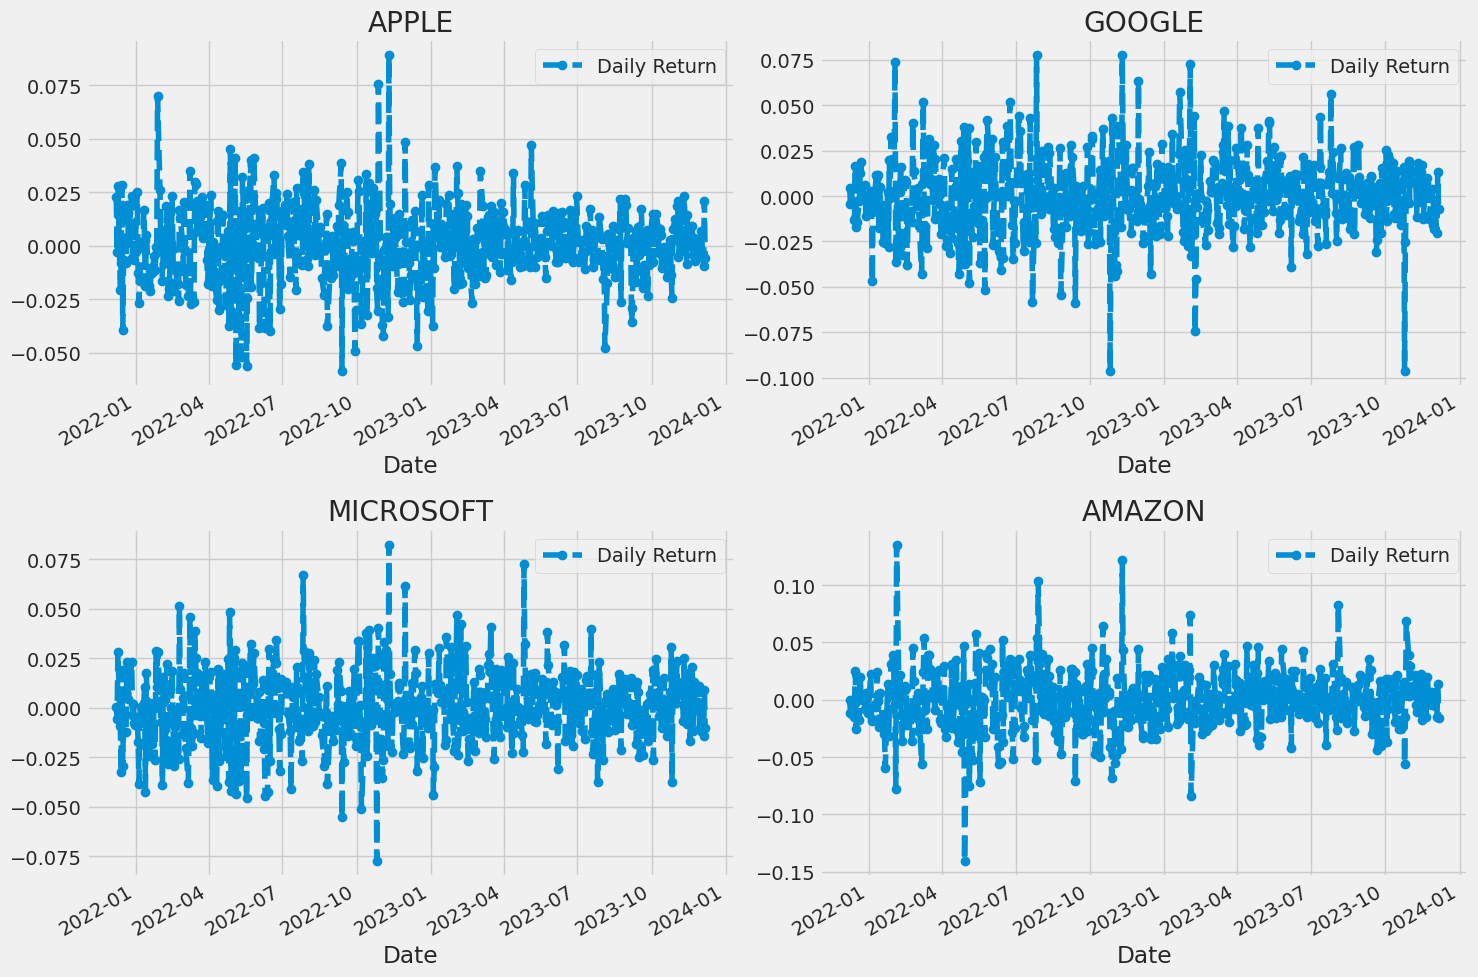

In [53]:
# We will use the pct_change to find the percentage change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we will plot the percentage change
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax = axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax = axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax = axes[1,0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax = axes[1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()

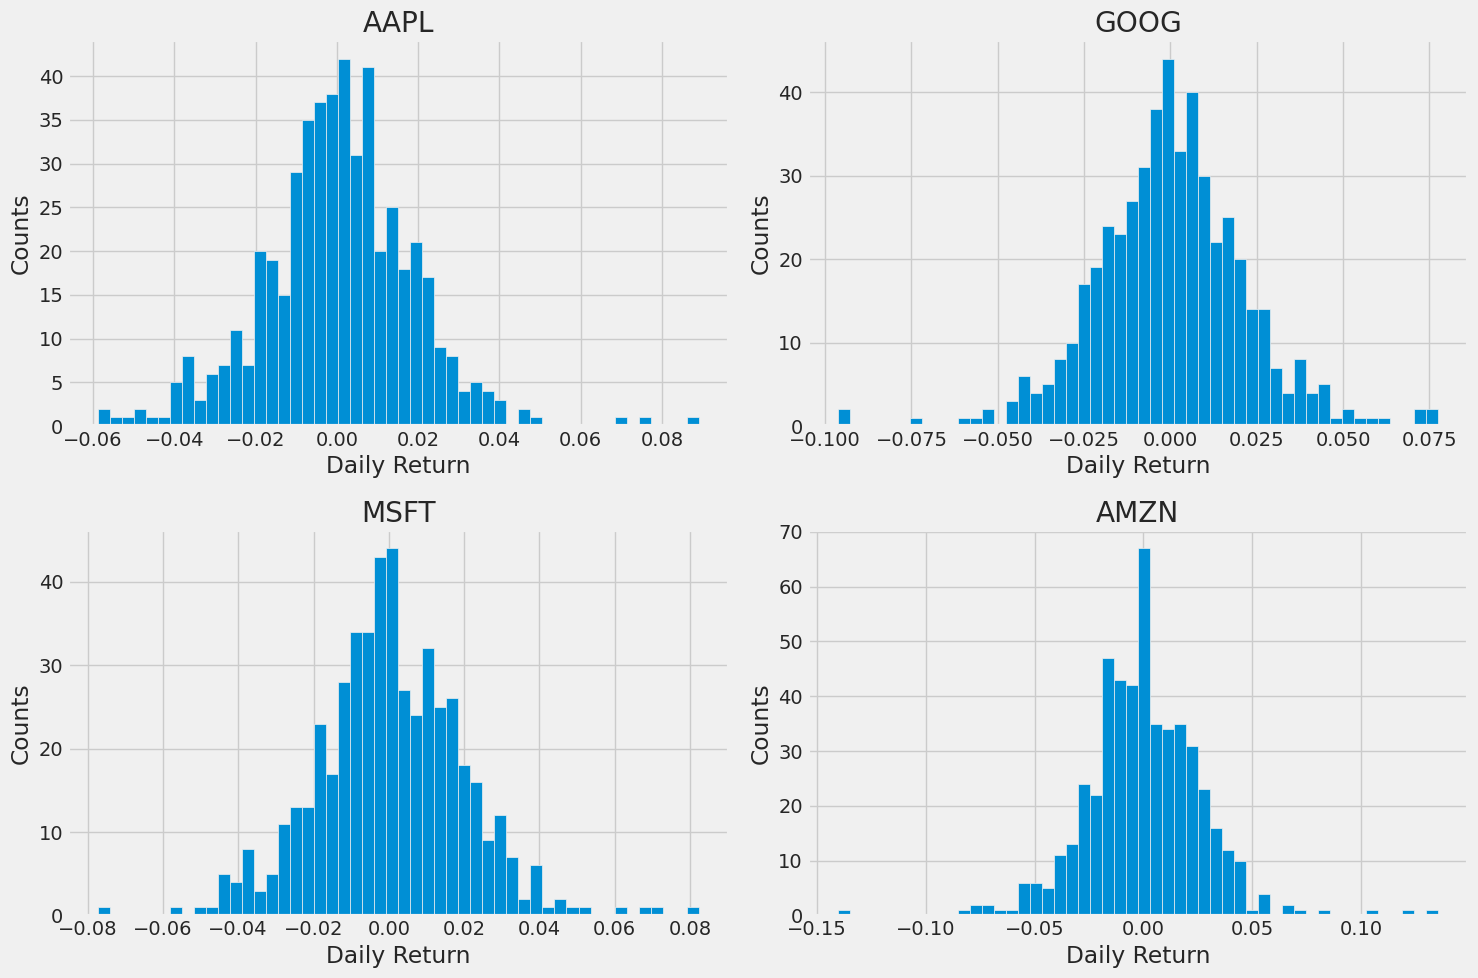

In [55]:
# now let's get an overall look at the average daily return using a histogram
plt.figure(figsize = (15,10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins = 50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()
plt.show()

In [56]:
# Grab all the closing prices for the tech list in one dataframe

closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']

# Make new tech return dataframe
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-12-07,NaN,NaN,NaN,NaN
2021-12-08,0.022783,-0.000037,0.004621,0.000149
2021-12-09,-0.002970,-0.011280,-0.004132,-0.005583
2021-12-10,0.028013,-0.011248,0.003842,0.028340
2021-12-13,-0.020674,-0.015356,-0.013254,-0.009167


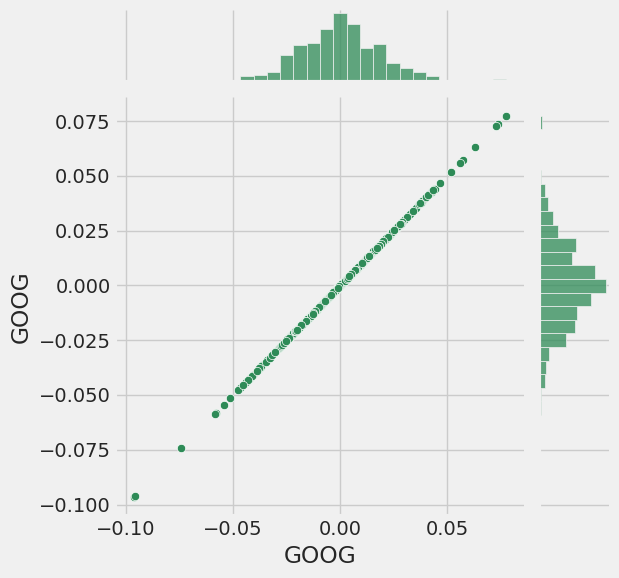

In [58]:
# Comparing Google to itself should show perfectly linear relationship
sns.jointplot(x = 'GOOG', y = 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')
plt.show()

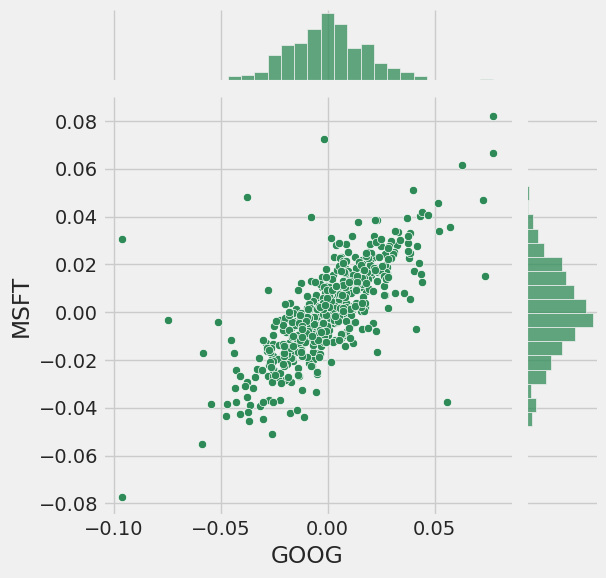

In [59]:
# we will use the jointplot to compare the daily return of Google and Microsoft
sns.jointplot(x = 'GOOG', y = 'MSFT', data = tech_rets, kind = 'scatter', color = 'seagreen')
plt.show()

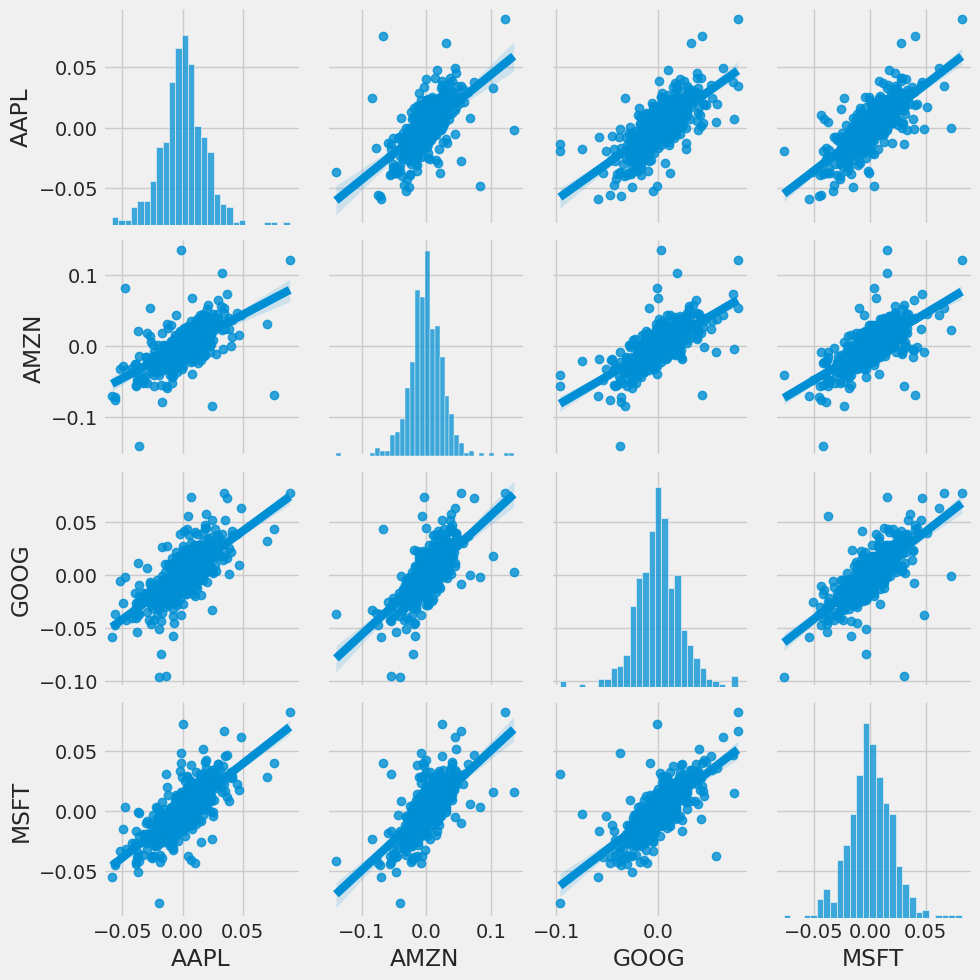

In [60]:
# Visual Analysis of all the comparisns
sns.pairplot(tech_rets, kind = 'reg')
plt.show()

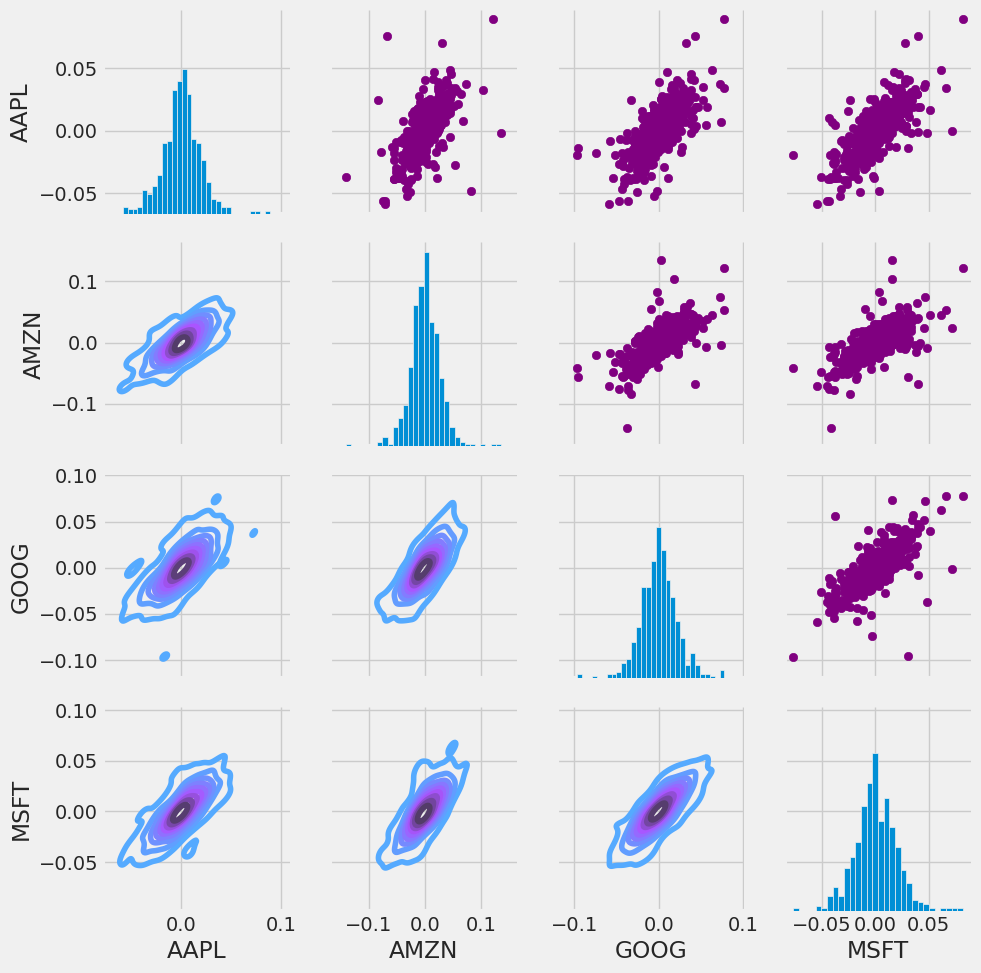

In [62]:
# Setup our figure by naming it return_fig, call pairplot on the dataframe
return_fig = sns.PairGrid(tech_rets.dropna())

# Using mapp_upper we can specify what the upper traingle will look like
return_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, including plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins = 30)
plt.show()

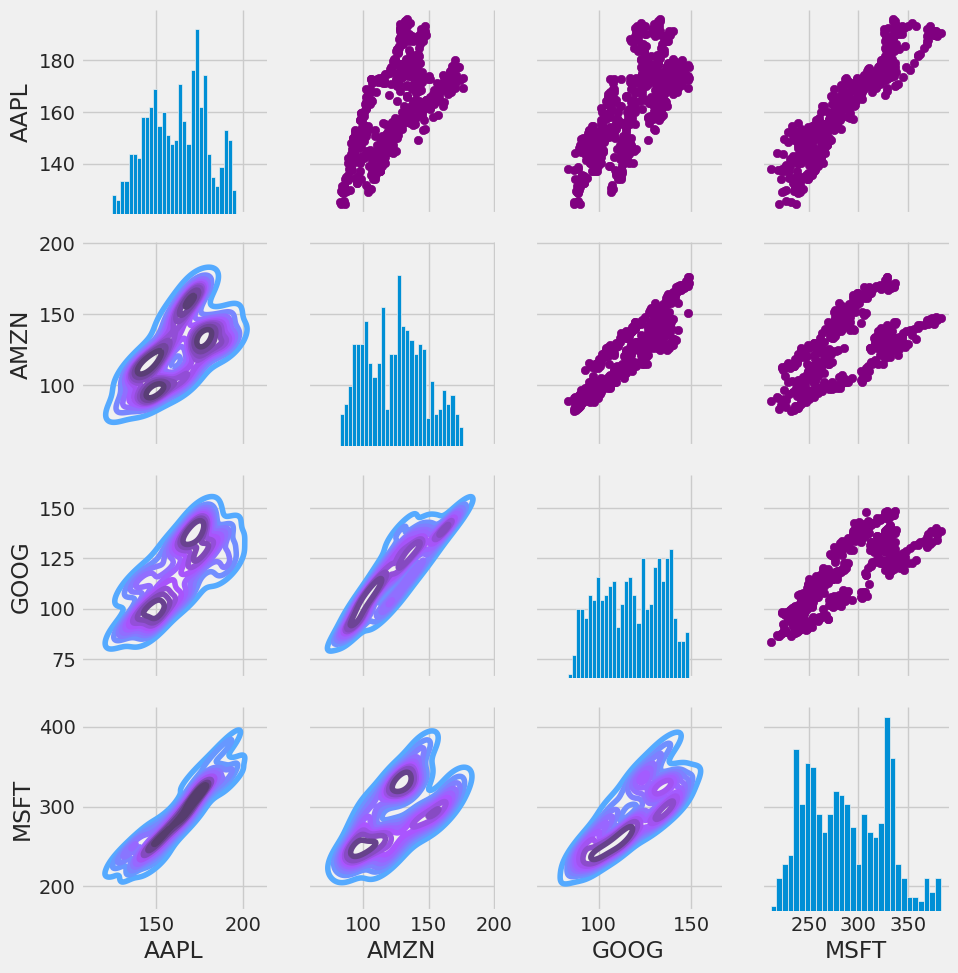

In [63]:
# Setup our figure by naming it return_fig, call pairplot on the dataframe
return_fig = sns.PairGrid(closing_df)

# Using mapp_upper we can specify what the upper traingle will look like
return_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, including plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins = 30)
plt.show()

# Correlation

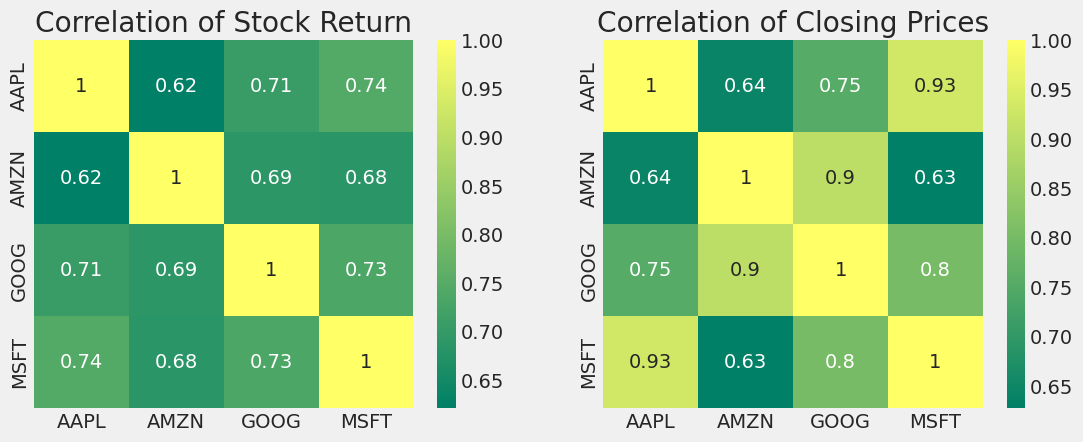

In [64]:
plt.figure(figsize = (12,10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = 'summer')
plt.title('Correlation of Stock Return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'summer')
plt.title("Correlation of Closing Prices")
plt.show()

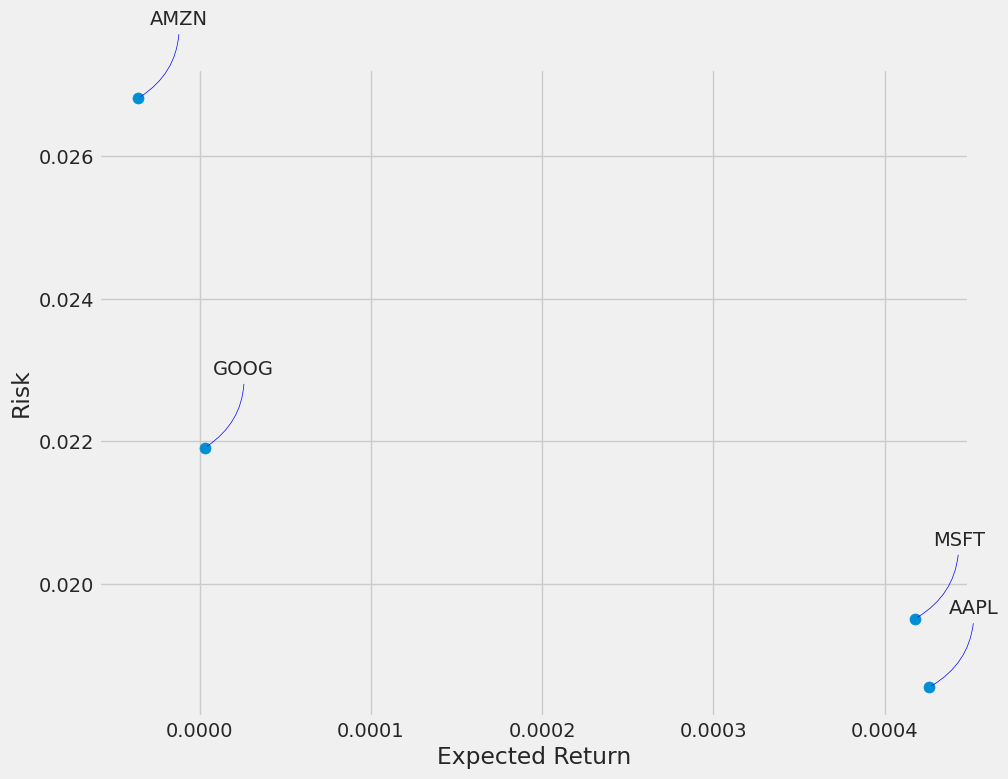

In [70]:
# comparing the expected return with the standard deviation of the daily returns
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize = (10,8))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x,y), xytext=(50, 50),
                 textcoords = 'offset points', ha = 'right', va = 'bottom',
                 arrowprops = dict(arrowstyle = '-', color = 'blue',
                 connectionstyle='arc3,rad=-0.3'))
plt.show()

# Model

In [71]:
# predicting the closing stock price of APPLE
# get the stock quote
df = pdr.get_data_yahoo('AAPl', start = '2012-01-01', end = datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449691,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516599,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787857,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767569,394024400


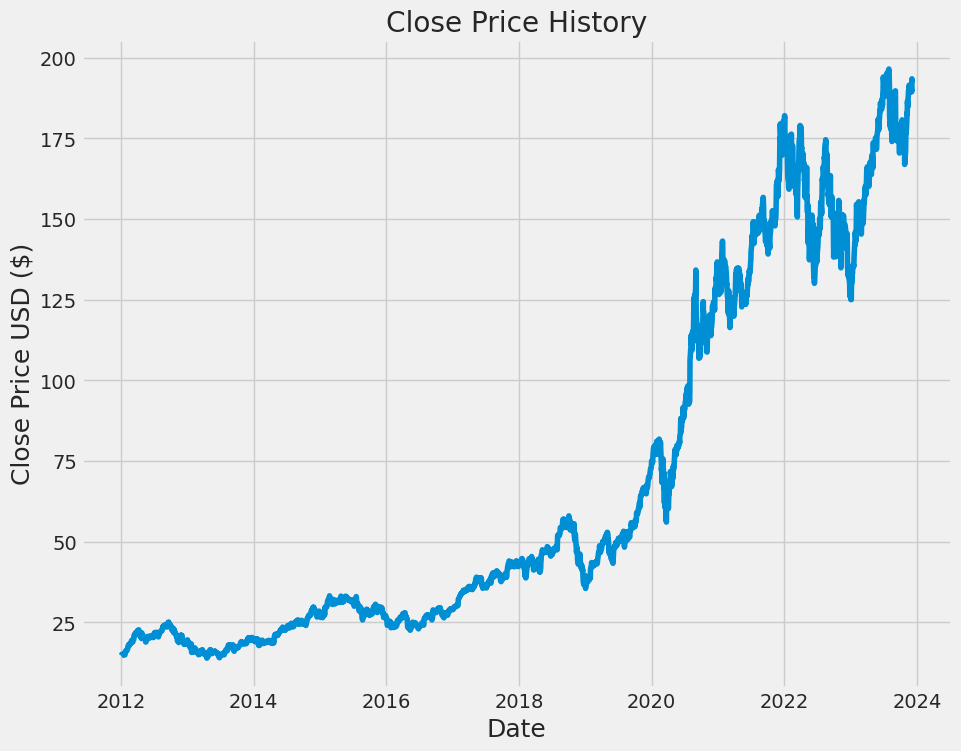

In [72]:
# closing price history
plt.figure(figsize = (10,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [73]:
# Creating new dataframe with only close column
data = df.filter(['Close'])

# Convert the dataframe into numpy array
dataset = data.values

# Get the number of rows to train the model
training_data_len = int(np.ceil(len(dataset * 95)))

training_data_len

3002

In [74]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.96153475],
       [0.98339749],
       [0.97737023]])

In [76]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

# Convert x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00